### NGC 383
1. Import the dataset of all the galaxies with a redshift from NED. 
2. Filter out the photometric redshift (we are only interested in the spectroscopic ones).
3. Import the SDSS dataset from CrossID of NGC 383. 
4. Filter out stars (we are only interested in galaxies).
5. Merge SDSS dataset with redshifts from NED dataset.


Default SQL query from CrossID to combine as many objects from NED dataset with the SDSS library: 
```SQL
SELECT 
   p.objID, p.ra, p.dec, p.run, p.rerun, p.camcol, p.field,
   dbo.fPhotoTypeN(p.type) as type,
   p.modelMag_u, p.modelMag_g, p.modelMag_r, p.modelMag_i, p.modelMag_z 
FROM #upload u
      JOIN #x x ON x.up_id = u.up_id
      JOIN PhotoTag p ON p.objID = x.objID 
ORDER BY x.up_id
```

In [37]:
import pandas as pd

In [38]:
ngc383_sdss = pd.read_csv('./sdss/ngc383.csv')
ngc383_sdss = ngc383_sdss[ngc383_sdss.type!='STAR']
ngc383_sdss.head()

,ObjectName,objID,ra,dec,run,rerun,camcol,field,type,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
0,NGC0386,1237680315521302757,16.880417,32.361924,8112,301,4,36,GALAXY,16.70224,14.84254,14.00605,13.57142,13.22501
1,SDSSJ010714.97+322204.7,1237680315521237929,16.812407,32.367995,8112,301,4,35,GALAXY,21.93794,22.84880,21.42741,20.35811,19.97164
2,2MASXJ01070798+3223335,1237680311772250504,16.783124,32.392580,8111,301,5,174,GALAXY,20.46482,18.56780,17.37289,16.87600,16.50400
3,SDSSJ010706.70+322257.6,1237680311772250496,16.777944,32.382681,8111,301,5,174,GALAXY,24.01941,20.65404,18.81966,18.14513,17.79100
4,UGC00679,1237680311772250464,16.765005,32.389555,8111,301,5,174,GALAXY,17.46509,16.28591,15.81043,15.55470,15.38543


In [39]:
ngc383_ned = pd.read_csv('./ned/ngc383.csv')
ngc383_ned = ngc383_ned[ngc383_ned.RedshiftFlag!='PHOT']
ngc383_ned.head()

,ObjectName,RA,DEC,Type,Velocity,Redshift,RedshiftFlag
0,NGC0383,16.85399,32.41256,G,5098,0.017005,NaN
1,VV193,16.85167,32.40833,GPair,4777,0.015934,NaN
2,NGC0382,16.84946,32.40386,G,5229,0.017442,NaN
3,SDSSJ010723.84+322411.8,16.84935,32.40329,G,5166,0.017233,SPEC
4,PiscesCloud,16.86186,32.38854,GGroup,4845,0.016161,NaN


In [40]:
# Final table of ngc383, cross-id table merged with redshifts from NED
ngc383 = pd.merge(ngc383_sdss, ngc383_ned[['ObjectName', 'Redshift', 'RedshiftFlag']], on='ObjectName')
ngc383.head()

,ObjectName,objID,ra,dec,run,rerun,camcol,field,type,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,Redshift,RedshiftFlag
0,NGC0386,1237680315521302757,16.880417,32.361924,8112,301,4,36,GALAXY,16.70224,14.84254,14.00605,13.57142,13.22501,0.018533,NaN
1,SDSSJ010714.97+322204.7,1237680315521237929,16.812407,32.367995,8112,301,4,35,GALAXY,21.93794,22.84880,21.42741,20.35811,19.97164,0.489833,SPEC
2,2MASXJ01070798+3223335,1237680311772250504,16.783124,32.392580,8111,301,5,174,GALAXY,20.46482,18.56780,17.37289,16.87600,16.50400,0.153931,SPEC
3,SDSSJ010706.70+322257.6,1237680311772250496,16.777944,32.382681,8111,301,5,174,GALAXY,24.01941,20.65404,18.81966,18.14513,17.79100,0.367908,SPEC
4,UGC00679,1237680311772250464,16.765005,32.389555,8111,301,5,174,GALAXY,17.46509,16.28591,15.81043,15.55470,15.38543,0.016998,NaN


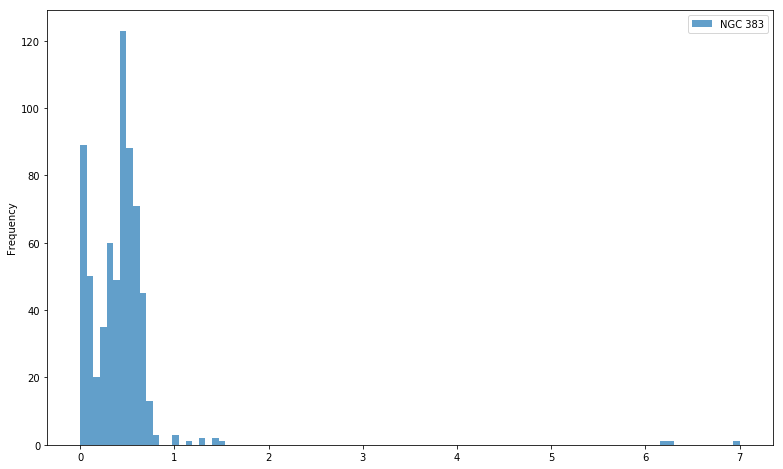

In [41]:
ngc383_hist = pd.DataFrame({ 'NGC 383': ngc383.Redshift }, columns=['NGC 383'])
ngc383_hist.plot.hist(alpha=0.7, figsize=(13,8), bins=100)

In [42]:
# Export merged list
ngc383.to_csv(r'./complete/ngc383.csv', index=False)